In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

## Data Loading

In [90]:
df = pd.read_csv("D:\Pune House Price Prediction\Pune house data.csv")

In [91]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [92]:
df.shape

(13320, 9)

In [93]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [94]:
df1 = df.drop(['area_type','availability','society','balcony'], axis='columns')
df1.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


## Data Cleaning

In [95]:
df1.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [96]:
df2 = df1.dropna()
df2.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [97]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [98]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\azeem\AppData\Local\Temp\ipykernel_7808\2746791635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))


In [99]:
df2.head()

,size,total_sqft,bath,price,site_location,BHK
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [100]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [101]:
df2[df2.BHK > 15]

,size,total_sqft,bath,price,site_location,BHK
1718,27 BHK,8000,27.0,230.0,Uruli Devachi,27
3379,19 BHK,2000,16.0,490.0,Dehu Road,19
3609,16 BHK,10000,16.0,550.0,Model colony,16
4684,43 Bedroom,2400,40.0,660.0,Salunke Vihar,43
11559,18 Bedroom,1200,18.0,200.0,Karve Road,18


In [102]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [103]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [104]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,size,total_sqft,bath,price,site_location,BHK
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


In [105]:
def convert_range_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [106]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_range_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(3)

,size,total_sqft,bath,price,site_location,BHK
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3


In [107]:
df3.loc[30]

size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
site_location    Gultekdi
BHK                     4
Name: 30, dtype: object

In [108]:
df3.drop(['size'], axis='columns', inplace=True)
df3.head()

,total_sqft,bath,price,site_location,BHK
0,1056.0,2.0,39.07,Alandi Road,2
1,2600.0,5.0,120.00,Ambegaon Budruk,4
2,1440.0,2.0,62.00,Anandnagar,3
3,1521.0,3.0,95.00,Aundh,3
4,1200.0,2.0,51.00,Aundh Road,2


In [109]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

## Feature Engineering

In [112]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.price_per_sqft.round(2)
df4.head()

,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [113]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1.320000e+04
mean     7.920878e+03
std      1.067272e+05
min      2.678298e+02
25%      4.268165e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [115]:
df4.to_csv("phpp.csv",index=False)

In [117]:
df4.site_location = df4.site_location.apply(lambda x: x.strip())
location_stats = df4['site_location'].value_counts(ascending=False)
location_stats

Kasba Peth         139
Bibvewadi          139
Laxmi Road         139
Ambegaon Budruk    139
Nana Peth          139
                  ... 
Fatima Nagar       135
Model colony       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: site_location, Length: 97, dtype: int64

In [119]:
location_stats.values.sum()

13200

In [122]:
len(location_stats[location_stats>10])

96

In [124]:
len(location_stats[location_stats<=10])

1

In [126]:
len(location_stats)

97

## Outlier Removal using Business Logic

In [128]:
df4[df4.total_sqft/df4.BHK<300].head()

,total_sqft,bath,price,site_location,BHK,price_per_sqft
9,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [130]:
df4.shape

(13200, 6)

In [132]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12456, 6)

### Outlier Removal using Standard Deviation and Mean

In [134]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [137]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-s)) & (subdf.price_per_sqft<=(m+s))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape
    

(10883, 6)

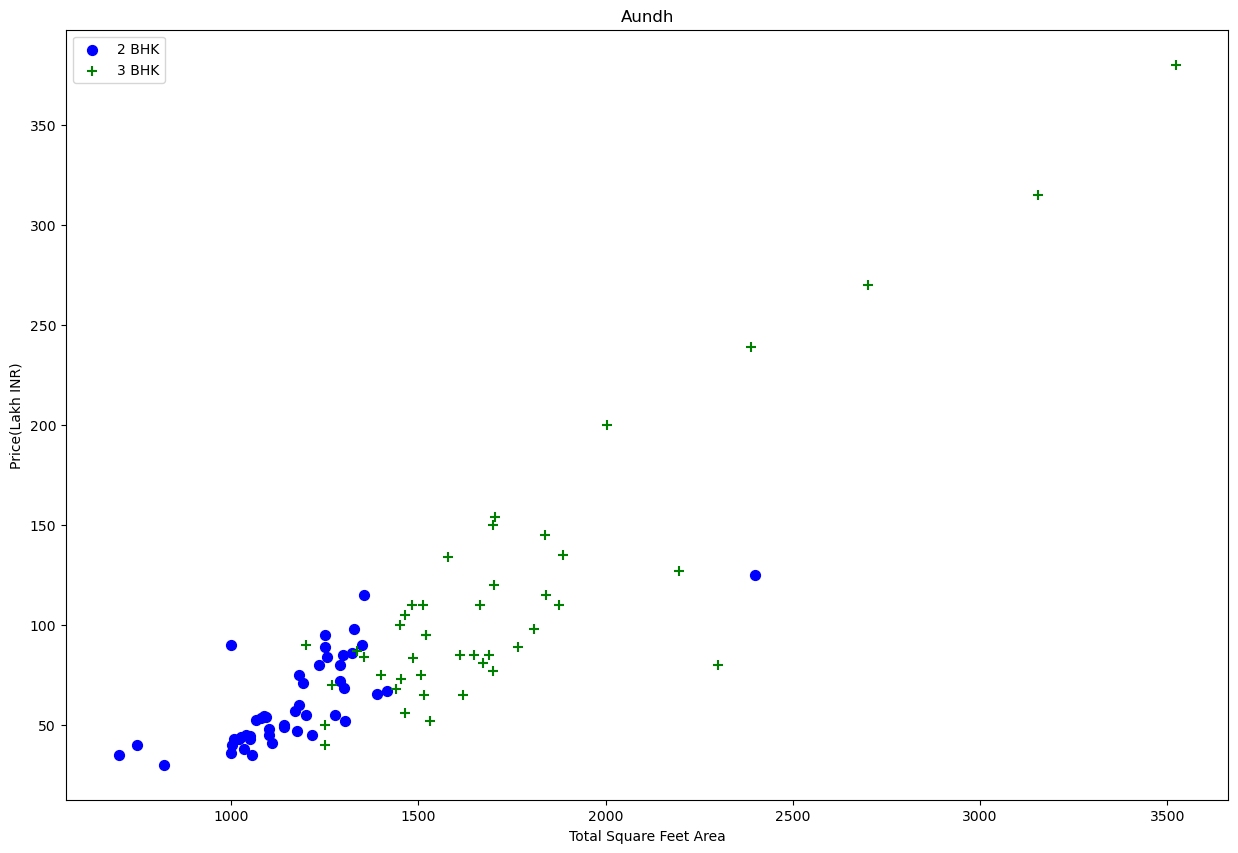

In [142]:
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.BHK==2)]
    bhk3 = df[(df.site_location==site_location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price(Lakh INR)')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df6,'Aundh')

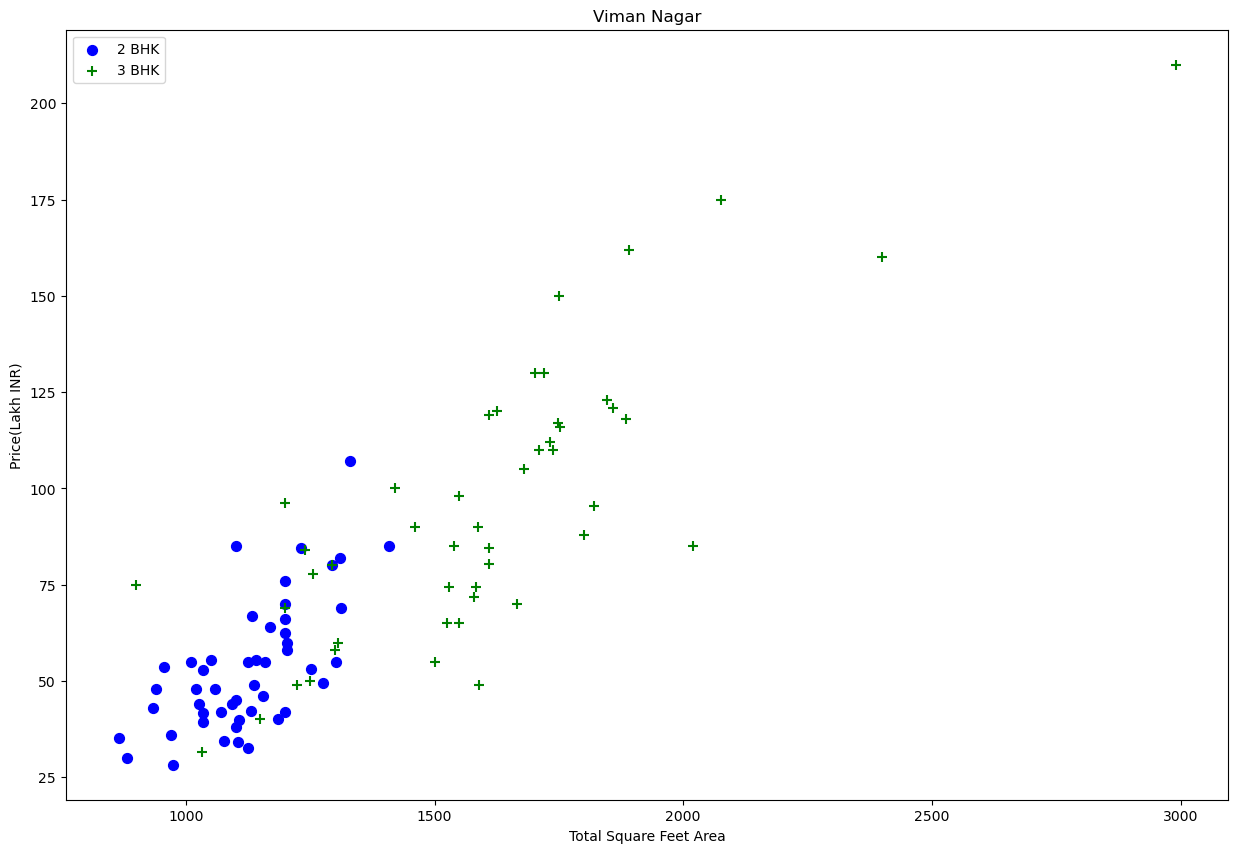

In [144]:
plot_scatter_chart(df6,'Viman Nagar')

In [156]:
{
    '1' : {
        'mean' : 4000,
        'std'  :2000,
        'count' : 40
    },
    '2' : {
        'mean' : 4300,
        'std' : 2300,
        'count' : 26
    },
}

{'1': {'mean': 4000, 'std': 2000, 'count': 40},
 '2': {'mean': 4300, 'std': 2300, 'count': 26}}

In [157]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df7 = df6.copy()
df7.shape

(7543, 6)

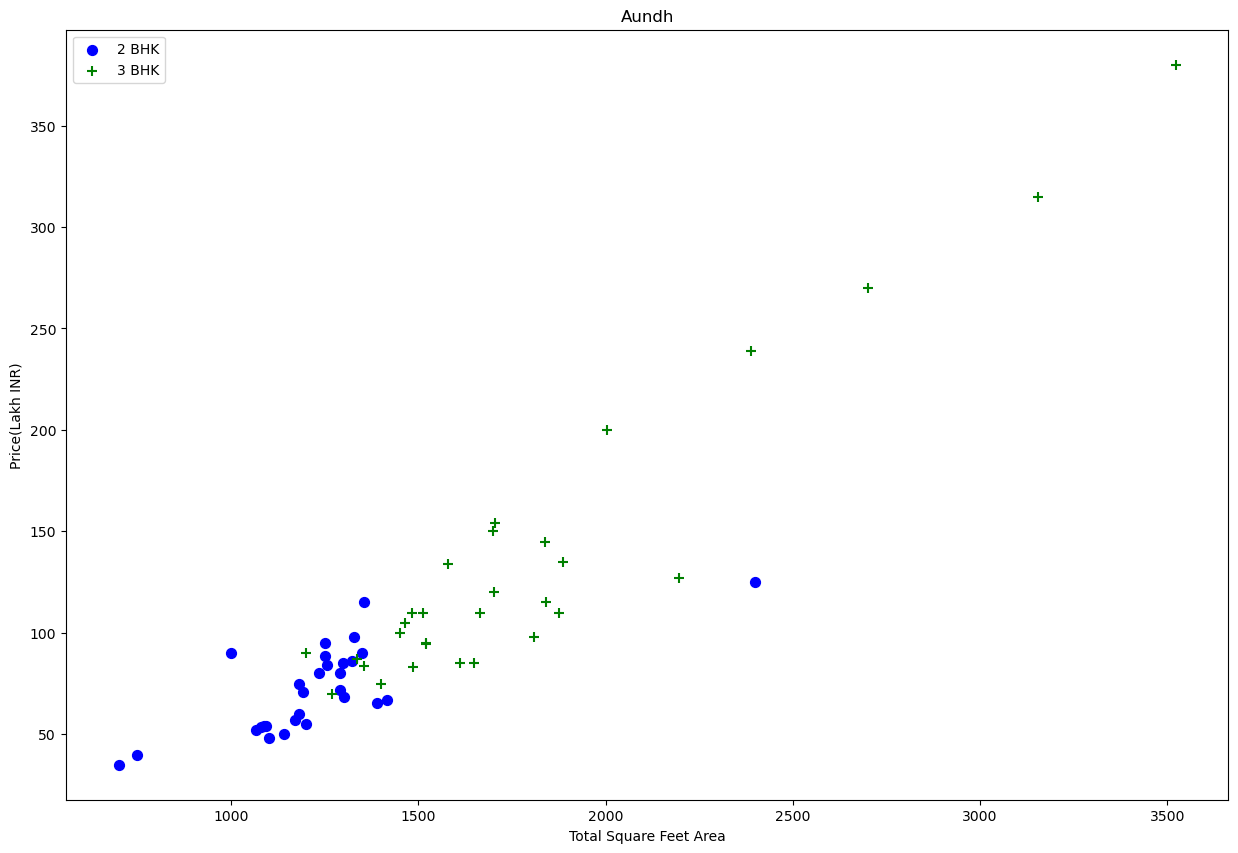

In [159]:
plot_scatter_chart(df7,'Aundh')

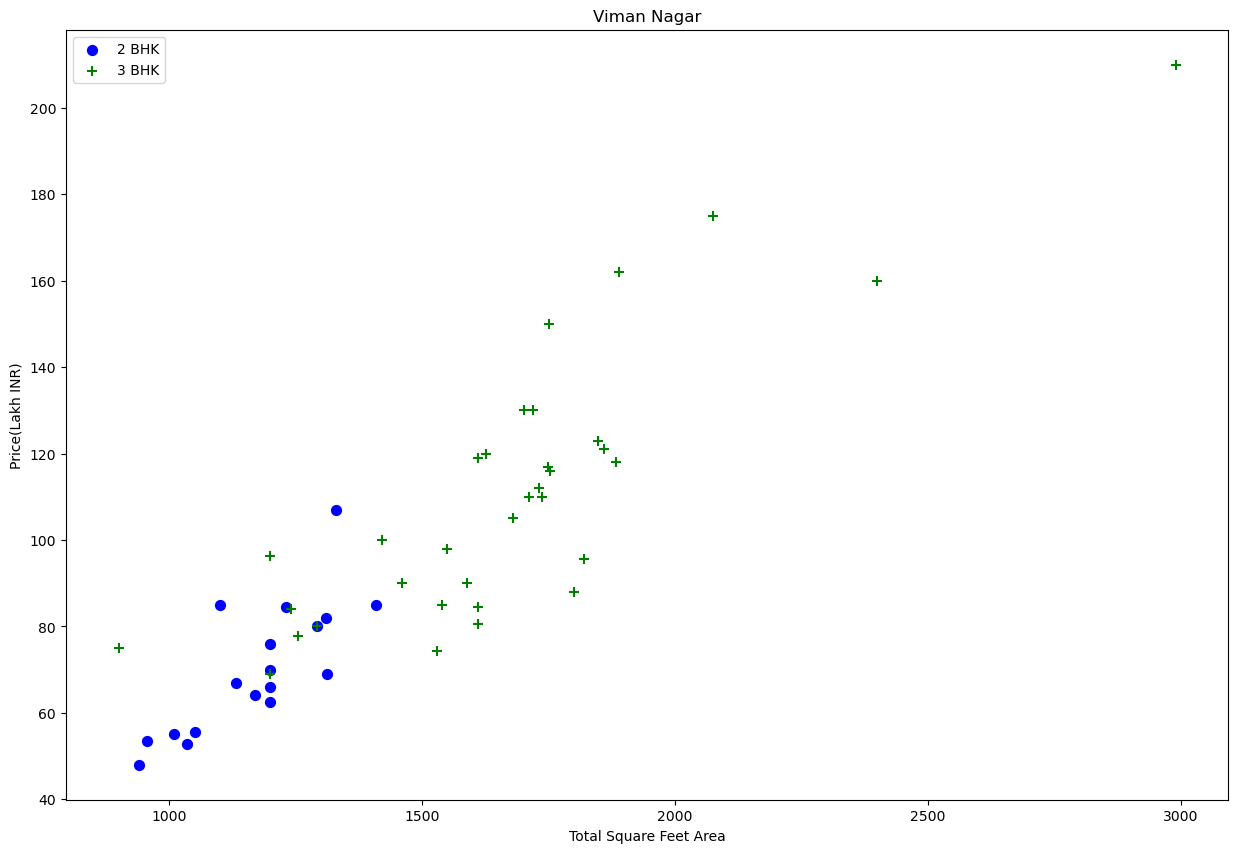

In [161]:
plot_scatter_chart(df7,'Viman Nagar')

Text(0, 0.5, 'Count')

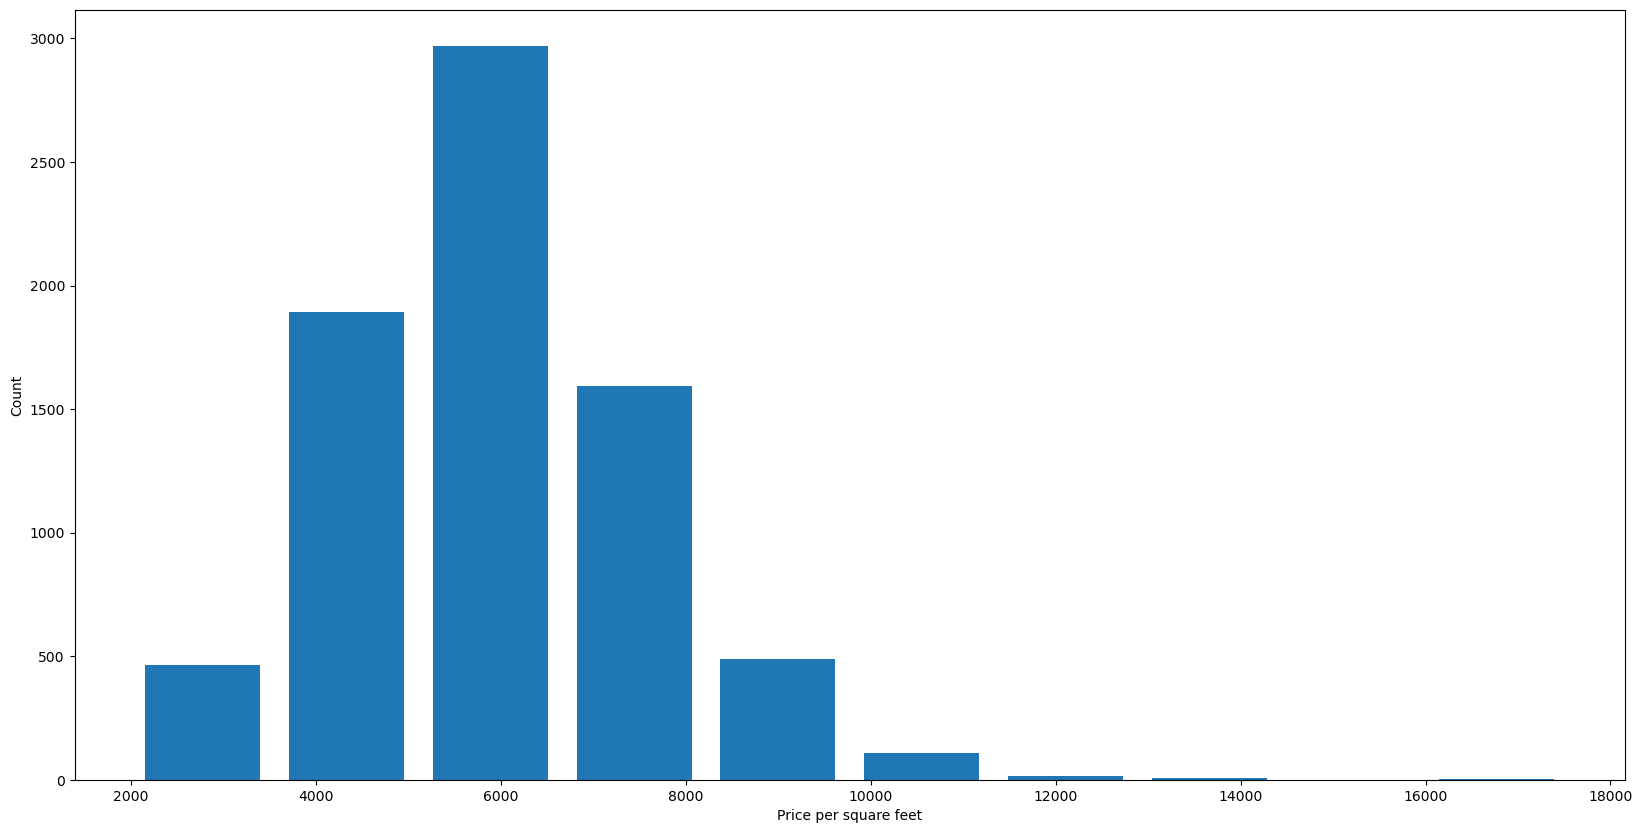

In [163]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

###  Outlier Removal using Bathrooms Feature

In [165]:
df7.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

Text(0, 0.5, 'Count')

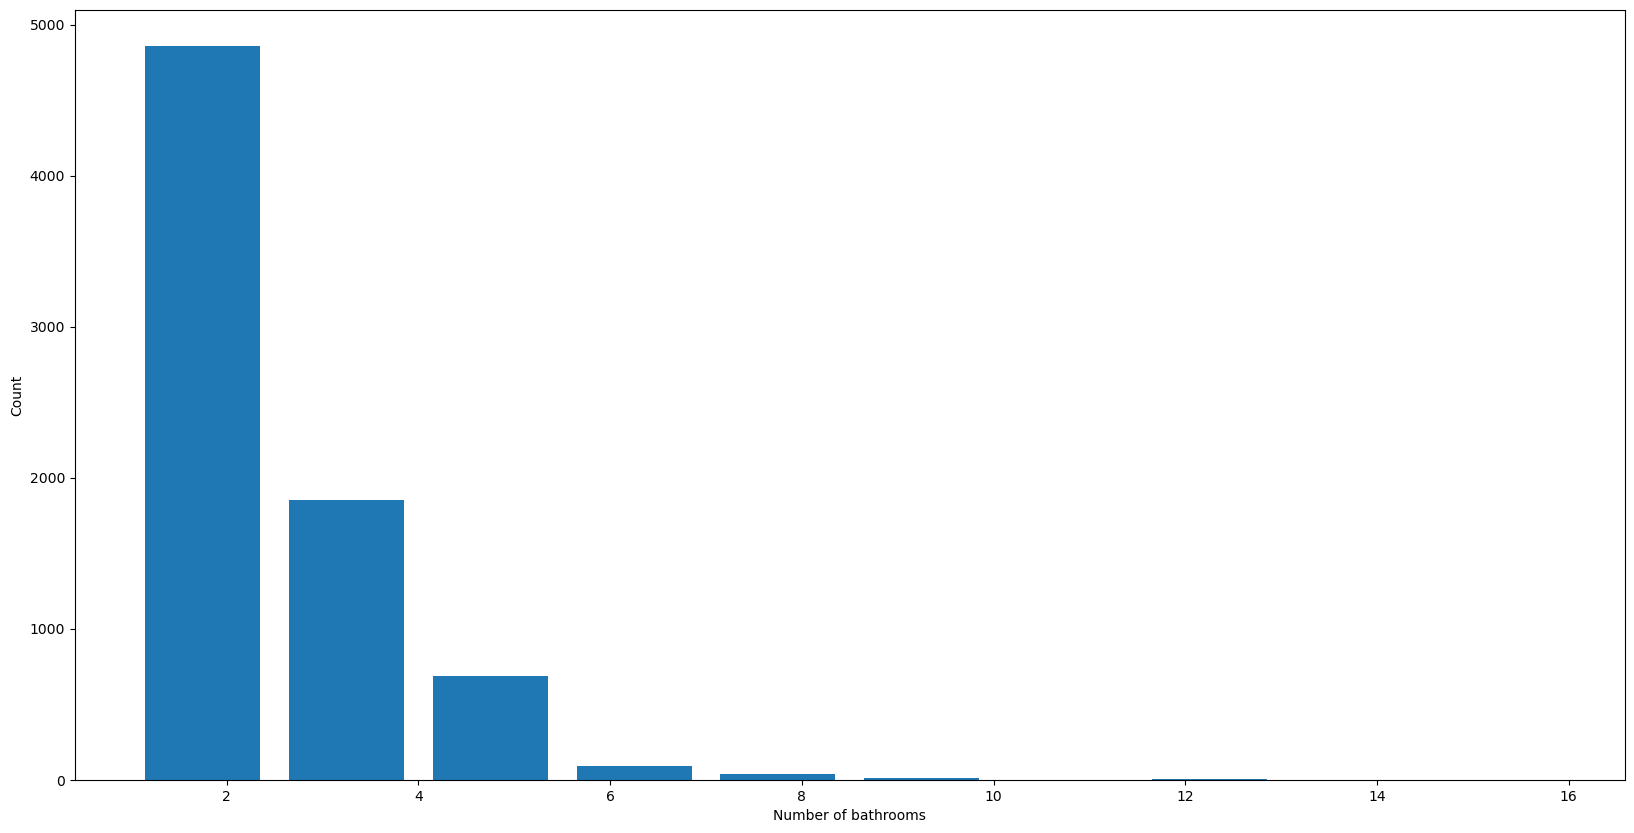

In [167]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [169]:
df7[df7.bath>10]

,total_sqft,bath,price,site_location,BHK,price_per_sqft
1211,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,4000.0,12.0,160.0,Wagholi,10,4000.000000


In [171]:
df7[df7.bath>df7.BHK+2]

,total_sqft,bath,price,site_location,BHK,price_per_sqft
772,1806.0,6.0,116.0,Baner,3,6423.034330
3067,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [173]:
df8 = df7[df7.bath<=df7.BHK]
df8.shape

(7088, 6)

In [175]:
df8.head()

,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2894.0,4.0,245.00,Alandi Road,4,8465.791292
2,1084.0,2.0,50.00,Alandi Road,2,4612.546125
3,1230.0,2.0,80.00,Alandi Road,2,6504.065041
4,1750.0,3.0,130.00,Alandi Road,3,7428.571429


In [177]:
df9 = df8.drop(['price_per_sqft'], axis='columns')
df9.head(3)

,total_sqft,bath,price,site_location,BHK
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2


## Using One Hot Encoding for Location

In [180]:
dummies = pd.get_dummies(df9.site_location)
dummies.head(10)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df10 = pd.concat([df9,dummies.drop('Warje',axis=1)],axis=1)
df10.head()

,total_sqft,bath,price,site_location,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df11 = df10.drop('site_location',axis='columns')
df11.head(2)

,total_sqft,bath,price,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df11.shape

(7088, 99)

## Building a Model 

In [194]:
X = df11.drop('price', axis='columns')
X.head(3)

,total_sqft,bath,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X.shape

(7088, 98)

In [197]:
Y = df11.price
Y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [199]:
len(Y)

7088

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [209]:
from sklearn.linear_model import LinearRegression
lr_clf  = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.889724082803091

## Using K Fold cross validation to measure accuracy of our LinearRegression model 

In [205]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.90473878, 0.88407196, 0.85220013, 0.90178244, 0.77414913])

## Find best model using GridSearchCV

In [207]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\azeem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.863388,{'normalize': False}
1,lasso,0.863959,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.771083,"{'criterion': 'mse', 'splitter': 'random'}"


## Testing the model for few properties

In [213]:
def predict_price(site_location,sqft,bath,BHK):
    loc_index = np.where(X.columns == site_location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [221]:
predict_price('Aundh', 1000, 2, 2)

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.2858233890093

In [217]:
predict_price('Aundh', 1000, 3, 3)

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.80309978941813

In [222]:
predict_price('Viman Nagar', 2000, 2, 2)

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


132.50888067929378

In [224]:
predict_price('Viman Nagar', 2000, 3, 3)

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


133.0261570797026

## Exporting the tested model to a pickle file

In [226]:
import pickle
with open('pune_hp_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)